In [ ]:
!pip install plotly==5.3.1

     |████████████████████████████████| 23.9 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
!pip install -q tensorflow
!pip install -q sklearn
!pip install -q xgboost

In [ ]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot
# Using plotly.express
import plotly.express as px
#import tensorflow as tf
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [ ]:
mdl_names = ["AdaBoost","DecisionTree","XGBoost","RandomForest"]
mdls = [AdaBoostRegressor(n_estimators=100,random_state=0), 
        DecisionTreeRegressor(random_state=0), 
        xgb.XGBRegressor(verbosity=0,random_state=0),
        RandomForestRegressor(n_estimators=100, random_state=0)
        ]

In [ ]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
train["date"] = pd.to_datetime(train["date"])
test["date"] = pd.to_datetime(test["date"])

In [ ]:
#average demand vs store

In [ ]:
print("train: ",train.shape)
print("test: ",test.shape)

train:  (913000, 4)
test:  (45000, 4)


In [ ]:
train.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
train["store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
train["item"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

### Aggregated dataset

In [ ]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [ ]:
agg = train[["date","sales"]].groupby("date").sum().reset_index()
agg["date"] = pd.to_datetime(agg["date"])
agg.shape

(1826, 2)

### Average Demand Across Store and Item

In [ ]:
train[["item","sales"]].groupby("item").mean().sort_values("sales",ascending = False)
#convert to hist

,sales
item,
15,88.030778
28,87.881325
13,84.316594
18,84.275794
25,80.686418
45,80.584173
38,80.521906
22,80.502245
36,77.028916


In [ ]:
train[["store","sales"]].groupby("store").mean().sort_values("sales",ascending = False)
#convert to hist

,sales
store,
2,67.033165
8,64.142048
3,59.530602
10,58.709288
9,55.049025
4,54.902946
1,47.268379
5,39.770164
6,39.733516


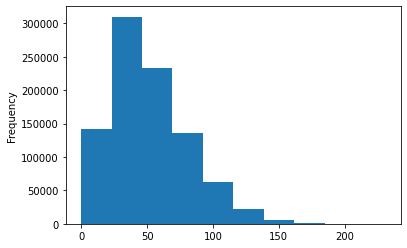

In [ ]:
train.sales.plot.hist()

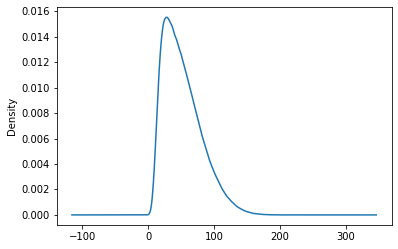

In [ ]:
train.sales.plot.density()

In [ ]:
#Aggregated sales chart
fig = px.line(train, x=agg["date"], y=agg["sales"])
fig.show()

In [ ]:
#mean,median,mode, 
#percentile 25% 75%, interquantile range, box plots, violin plots 
#

### Data Preparation

In [ ]:
#split agg to train and test. Keep first 
print("shape: ",agg.shape)
train = agg[:1500].copy()
test = agg[1500:].copy()
print("train shape: ",train.shape)
print("test shape: ",test.shape)

shape:  (1826, 2)
train shape:  (1500, 2)
test shape:  (326, 2)


In [ ]:
#test dataset preparation
#training dataset preparation and feature engineering
test_dataset = test.copy()
for i in range(12, 0, -1):
    test_dataset['t-' + str(i)] = test_dataset.sales.shift(i)
test_dataset = test_dataset.dropna()
test_dataset['month'] = test_dataset.date.dt.month
test_dataset['day_of_month'] = test_dataset.date.dt.day
test_dataset['day_of_year'] = test_dataset.date.dt.dayofyear 
test_dataset['week_of_year'] = test_dataset.date.dt.weekofyear
test_dataset['day_of_week'] = test_dataset.date.dt.dayofweek
test_dataset['year'] = test_dataset.date.dt.year
test_dataset["is_wknd"] = test_dataset.date.dt.weekday // 4 #select 5 and 6 (sat & sun)
test_dataset['is_month_start'] = test_dataset.date.dt.is_month_start.astype(int)
test_dataset['is_month_end'] = test_dataset.date.dt.is_month_end.astype(int) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
#training dataset preparation and feature engineering
train_dataset = train.copy()
for i in range(12, 0, -1):
    train_dataset['t-' + str(i)] = train_dataset.sales.shift(i)
train_dataset = train_dataset.dropna()
train_dataset['month'] = train_dataset.date.dt.month
train_dataset['day_of_month'] = train_dataset.date.dt.day
train_dataset['day_of_year'] = train_dataset.date.dt.dayofyear 
train_dataset['week_of_year'] = train_dataset.date.dt.weekofyear
train_dataset['day_of_week'] = train_dataset.date.dt.dayofweek
train_dataset['year'] = train_dataset.date.dt.year
train_dataset["is_wknd"] = train_dataset.date.dt.weekday // 4 #select 5 and 6 (sat & sun)
train_dataset['is_month_start'] = train_dataset.date.dt.is_month_start.astype(int)
train_dataset['is_month_end'] = train_dataset.date.dt.is_month_end.astype(int) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
test_dataset.head()

,date,sales,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end
1512,2017-02-21,20582,21827.0,23532.0,25311.0,26487.0,17580.0,20486.0,20568.0,21813.0,23519.0,24852.0,26427.0,17435.0,2,21,52,8,1,2017,0,0,0
1513,2017-02-22,20425,23532.0,25311.0,26487.0,17580.0,20486.0,20568.0,21813.0,23519.0,24852.0,26427.0,17435.0,20582.0,2,22,53,8,2,2017,0,0,0
1514,2017-02-23,22127,25311.0,26487.0,17580.0,20486.0,20568.0,21813.0,23519.0,24852.0,26427.0,17435.0,20582.0,20425.0,2,23,54,8,3,2017,0,0,0
1515,2017-02-24,23433,26487.0,17580.0,20486.0,20568.0,21813.0,23519.0,24852.0,26427.0,17435.0,20582.0,20425.0,22127.0,2,24,55,8,4,2017,1,0,0
1516,2017-02-25,25052,17580.0,20486.0,20568.0,21813.0,23519.0,24852.0,26427.0,17435.0,20582.0,20425.0,22127.0,23433.0,2,25,56,8,5,2017,1,0,0


In [ ]:
train_dataset.head()

,date,sales,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end
12,2013-01-13,17741,13696.0,13678.0,14488.0,15677.0,16237.0,17291.0,11769.0,13560.0,13878.0,14642.0,15633.0,16679.0,1,13,13,2,6,2013,1,0,0
13,2013-01-14,11746,13678.0,14488.0,15677.0,16237.0,17291.0,11769.0,13560.0,13878.0,14642.0,15633.0,16679.0,17741.0,1,14,14,3,0,2013,0,0,0
14,2013-01-15,13625,14488.0,15677.0,16237.0,17291.0,11769.0,13560.0,13878.0,14642.0,15633.0,16679.0,17741.0,11746.0,1,15,15,3,1,2013,0,0,0
15,2013-01-16,13591,15677.0,16237.0,17291.0,11769.0,13560.0,13878.0,14642.0,15633.0,16679.0,17741.0,11746.0,13625.0,1,16,16,3,2,2013,0,0,0
16,2013-01-17,14587,16237.0,17291.0,11769.0,13560.0,13878.0,14642.0,15633.0,16679.0,17741.0,11746.0,13625.0,13591.0,1,17,17,3,3,2013,0,0,0


In [ ]:

train_dataset_x = train_dataset.loc[:, train_dataset.drop(["date",'sales'],axis=1).columns]
train_dataset_y = train_dataset['sales']
test_dataset_x = test_dataset.loc[:, test_dataset.drop(["date",'sales'],axis=1).columns]
test_dataset_y = test_dataset['sales']


In [ ]:
train_dataset_x.head(1)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,month,day_of_month,day_of_year,week_of_year,day_of_week,year,is_wknd,is_month_start,is_month_end
12,13696.0,13678.0,14488.0,15677.0,16237.0,17291.0,11769.0,13560.0,13878.0,14642.0,15633.0,16679.0,1,13,13,2,6,2013,1,0,0


In [ ]:
train_dataset_y.head(1)

12    17741
Name: sales, dtype: int64

In [ ]:
trained_mdls = {}

In [ ]:
print("Starting model train..")
for i,mdl in enumerate(mdls):
    print(mdl_names[i])
    fit = mdl.fit(train_dataset_x, train_dataset_y)
    trained_mdls[mdl_names[i]] = fit

Starting model train..
AdaBoost
DecisionTree
XGBoost
RandomForest


In [ ]:
for i,key in enumerate(trained_mdls):
    y_pred_train = trained_mdls[key].predict(train_dataset_x)
    y_pred_test = trained_mdls[key].predict(test_dataset_x)
    y_actual_train = np.array(train_dataset_y)
    y_actual_test = np.array(test_dataset_y)
    MAPE_train = mape(y_actual_train,y_pred_train)
    MAPE_test = mape( y_actual_test,y_pred_test)
    MAE_train = mae(y_actual_train,y_pred_train)
    MAE_test = mae( y_actual_test,y_pred_test)
    print(key+":")
    print("  Train:")
    print("  MAPE:",MAPE_train," MAE:",MAE_train)
    print("  Test:")
    print("  MAPE:",MAPE_test," MAE:",MAE_test)

AdaBoost:
  Train:
  MAPE: 0.0419029578339944  MAE: 967.1466455909857
  Test:
  MAPE: 0.0395693863248332  MAE: 1171.1873142193401
DecisionTree:
  Train:
  MAPE: 0.0  MAE: 0.0
  Test:
  MAPE: 0.032867196817626086  MAE: 957.608280254777
XGBoost:
  Train:
  MAPE: 0.011319294709071897  MAE: 272.87086207892304
  Test:
  MAPE: 0.021397733580268422  MAE: 641.5981414211783
RandomForest:
  Train:
  MAPE: 0.007194010983266098  MAE: 165.91845430107526
  Test:
  MAPE: 0.02279194033729613  MAE: 674.5379617834396


In [ ]:
#Aggregated sales chart
for i,key in enumerate(trained_mdls):    
    y_pred_test = trained_mdls[key].predict(test_dataset_x)
    test_dataset["Predictions"] = y_pred_test
    
    fig = px.line(test_dataset, x="date", y=["sales","Predictions"],title=f'Test Predictions: {key}')
    fig.show()

In [ ]:
#Aggregated sales chart
for i,key in enumerate(trained_mdls):    
    y_pred_train = trained_mdls[key].predict(train_dataset_x)
    train_dataset["Predictions"] = y_pred_train
    
    fig = px.line(train_dataset, x="date", y=train_dataset[["sales","Predictions"]].columns,title=f'Train Predictions: {key}')
    fig.show()